In [1]:
# Jupyter Notebook settings

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%autosave 1
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Plotting settings
import matplotlib.pyplot as plt
size=35
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

Autosaving every 1 seconds


# Accessing files

Every file under any folder in ./data is parsed and put into dictionaries that group videos of the same source.
Videos of the same source are considered videos coming from the same Subject, same Session, same OD/OS, same (x, y),
same type (Confocal, OA790, OA850).

The parsing is case insensitive with the following rules:

**unmarked videos**:
must not contain 'mask' or '_marked'

**marked videos**:
Must end with '_marked.\<<file_extension\>>'

**standard deviation images**:
Must end with
'_std.\<<file_extension\>>'

**vessel mask images**: 
Must end with
'_vessel_mask.\<<file_extension\>>'

**channel type**:
must contain one of 'OA790', 'OA850', 'Confocal' (case insensitive)

### Example to using VideoSession objects and the get_video_session() function
(useful for training and training)

In [2]:
from sharedvariables import get_video_sessions
from os.path import basename

video_sessions = get_video_sessions(should_have_marked_cells=True,
                                    should_be_registered=True)
for session in video_sessions:
        assert session.has_marked_video
        assert session.is_registered
        assert session.has_marked_cells
        print('-----------------------')
        print('Video file:', basename(session.video_file))
        print('Does video have a corresponding marked video?:', session.has_marked_video)
        print('Subject number:', session.subject_number)
        print('Session number:', session.session_number)
        print('Marked Video OA790:', basename(session.marked_video_oa790_file))
        print('Std dev image confocal:', basename(session.std_image_confocal_file))
        print('Std dev image OA850:', basename(session.std_image_oa850_file))
        print('Vessel mask OA850:', basename(session.vessel_mask_oa850_file))
        print('Vessel mask confocal:', basename(session.vessel_mask_confocal_file))
        print('Cell position csv files:', *[basename(f) for f in session.cell_position_csv_files], sep='\n')
        print()
        
print('Number of video sessions ', len(video_sessions))

-----------------------
Video file: Subject25_Session298_OD_(-2,0)_1.03x1_1642_OA790nm_dewarped1_extract_reg_cropped.avi
Does video have a corresponding marked video?: True
Subject number: 25
Session number: 298
Marked Video OA790: Subject25_Session298_OD_(-2,0)_1.03x1_1642_OA790nm_dewarped1_extract_reg_cropped_marked.avi
Std dev image confocal: Subject25_Session298_OD_(-2,0)_1.03x1_1642_Confocal_dewarped1_extract_reg_std.tif
Std dev image OA850: Subject25_Session298_OD_(-2,0)_1.03x1_1642_OA850nm_dewarped1_extract_reg_std.tif
Vessel mask OA850: Subject25_Session298_OD_(-2,0)_1.03x1_1642_OA850nm_vessel_mask.JPEG
Vessel mask confocal: Subject25_Session298_OD_(-2,0)_1.03x1_1642_Confocal_vessel_mask.jpg
Cell position csv files:
Subject25_Session298_OD_(-2,0)_1.03x1_1642_OA790nm_dewarped1_extract_reg_cropped_cords.csv

-----------------------
Video file: Subject3_Session217_OS_(2,0)_1x1_988_OA790nm_dewarped1_extract_reg_cropped.avi
Does video have a corresponding marked video?: True
Subject

# Reading frames from videos - (and cell positions for each frame)

You can get access to the frames of the video session.

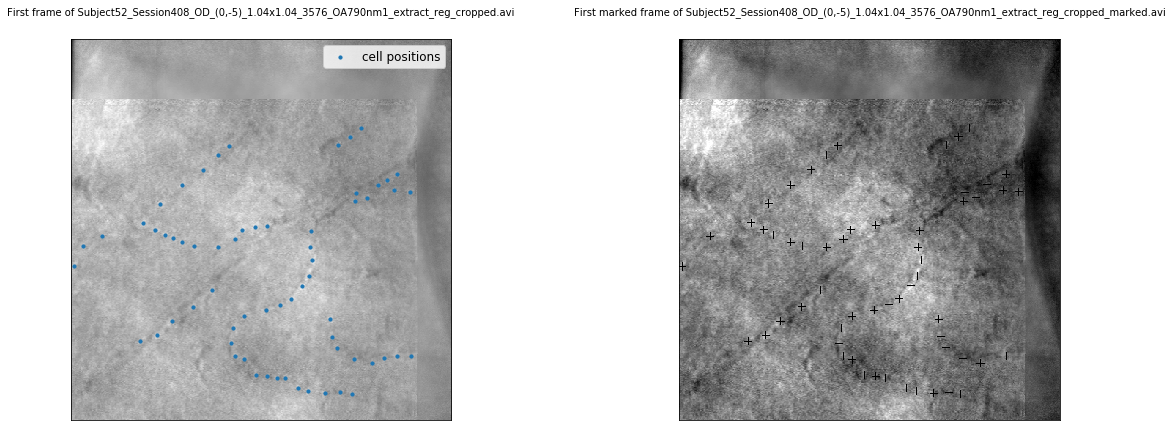

In [27]:
import matplotlib.pyplot as plt
from sharedvariables import get_video_sessions
from plotutils import no_ticks

video_sessions = get_video_sessions(should_have_marked_cells=True,
                                    should_be_registered=True)
_, axes = plt.subplots(1, 2, figsize=(20, 7))
no_ticks(axes)

axes[0].imshow(session.frames_oa790[0], cmap='gray')
axes[0].set_title(f"First frame of {basename(session.video_oa790_file)}", fontsize=10)
axes[0].scatter(session.cell_positions[0][:, 0], session.cell_positions[0][:, 1], label='cell positions', s=10)
axes[0].legend()
    
axes[1].imshow(session.marked_frames_oa790[0], cmap='gray')
axes[1].set_title(f"First marked frame of {basename(session.marked_video_oa790_file)}", fontsize=10)
pass

# How to extract cell and no cell patches

## Using SessionPatchExtractor (Object oriented way) 

### Simple patch extraction

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


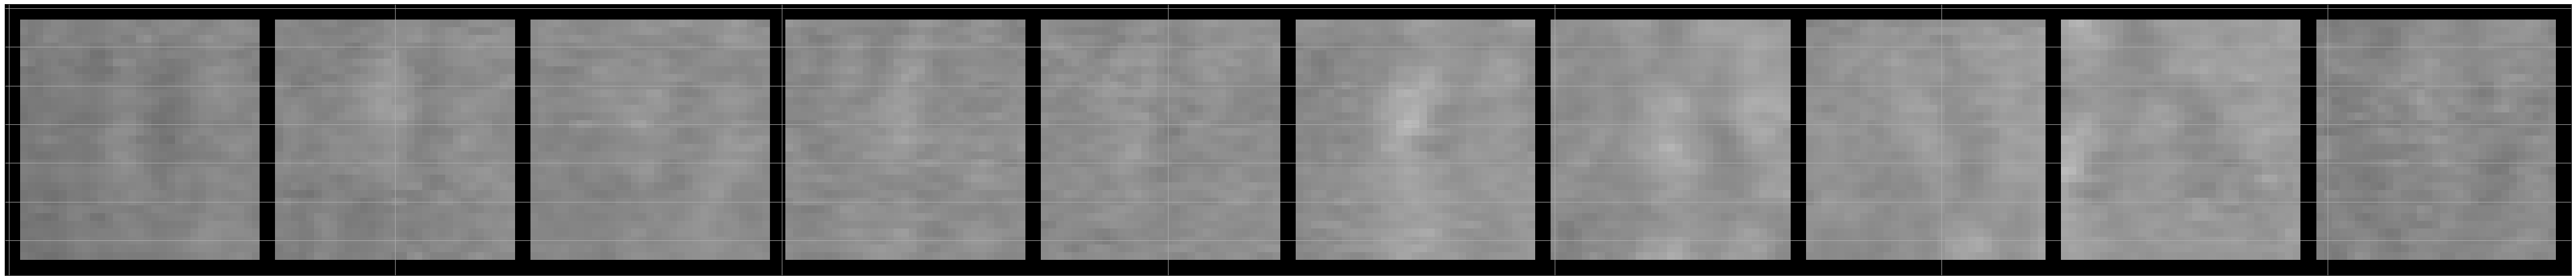

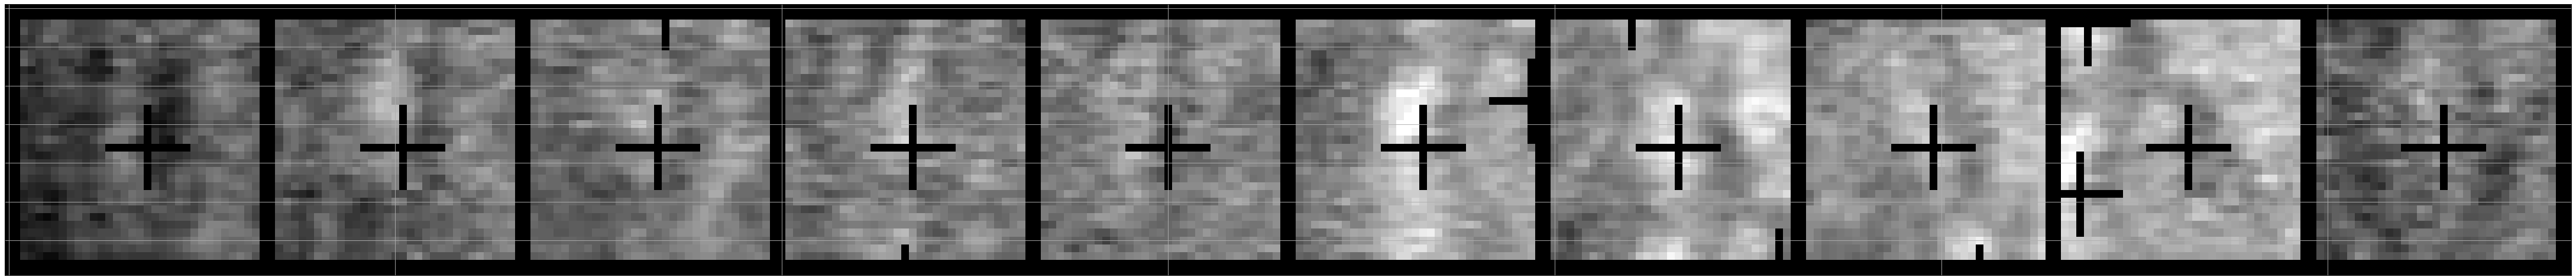

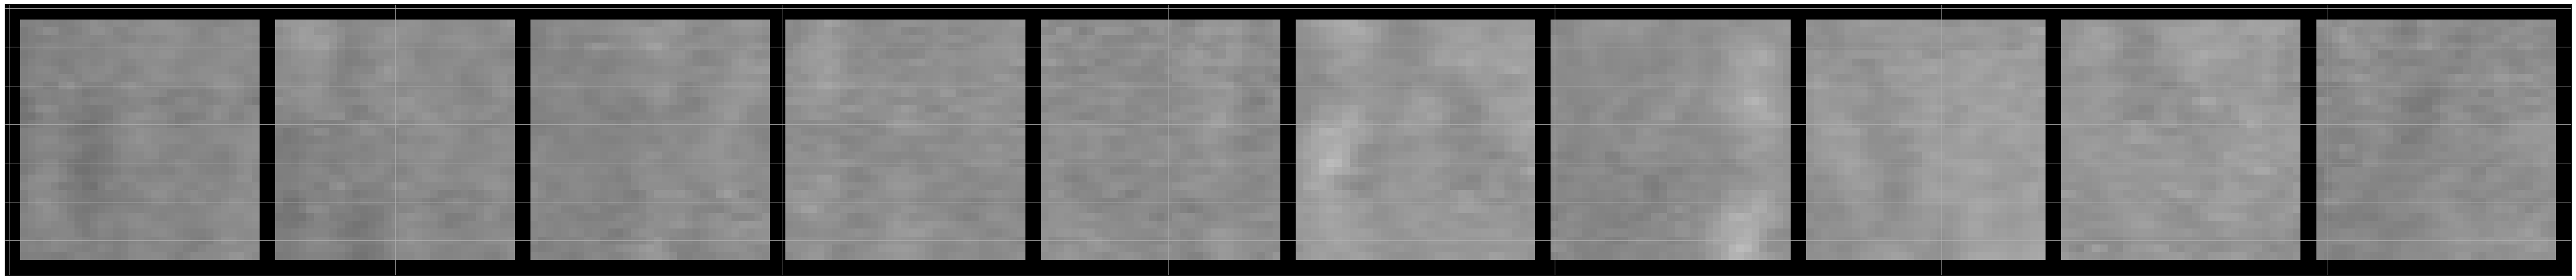

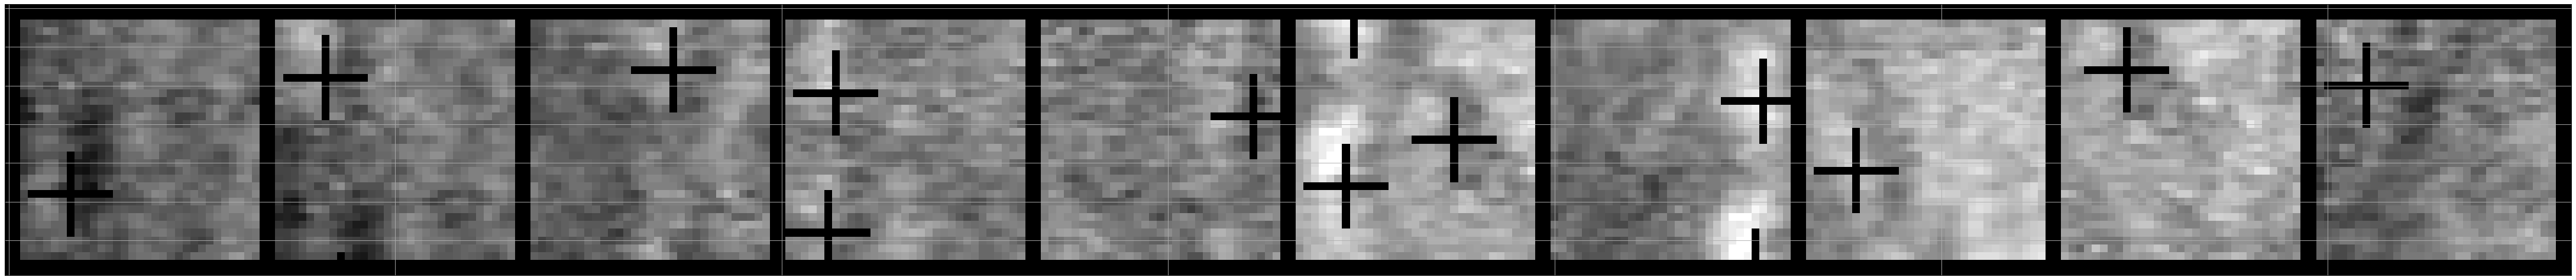

In [7]:
%load_ext autoreload
%autoreload 2

from sharedvariables import get_video_sessions
from patchextraction import SessionPatchExtractor
from plotutils import plot_images_as_grid

video_sessions = get_video_sessions(should_have_marked_cells=True)
vs = video_sessions[0]

patch_extractor = SessionPatchExtractor(vs, patch_size=31)

plot_images_as_grid(patch_extractor.cell_patches_oa790[:10])
plot_images_as_grid(patch_extractor.marked_cell_patches_oa790[:10])

plot_images_as_grid(patch_extractor.non_cell_patches_oa790[:10])
plot_images_as_grid(patch_extractor.marked_non_cell_patches_oa790[:10])

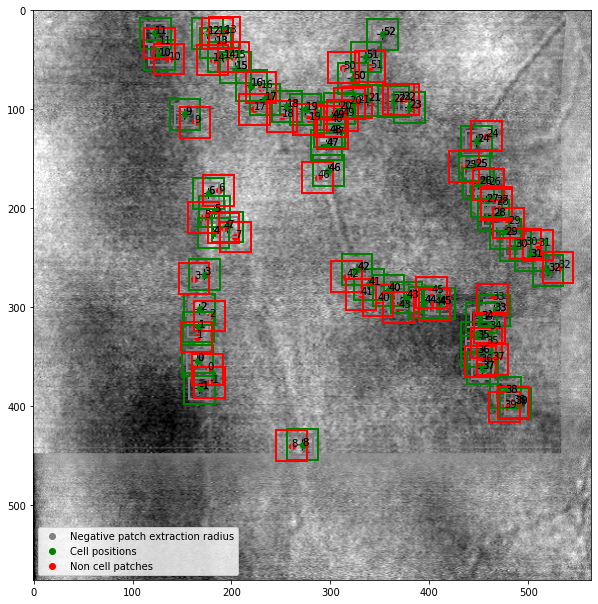

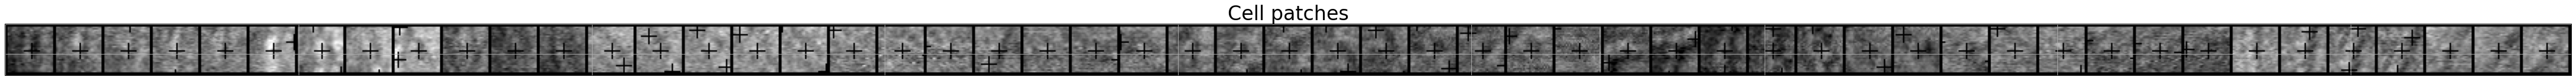

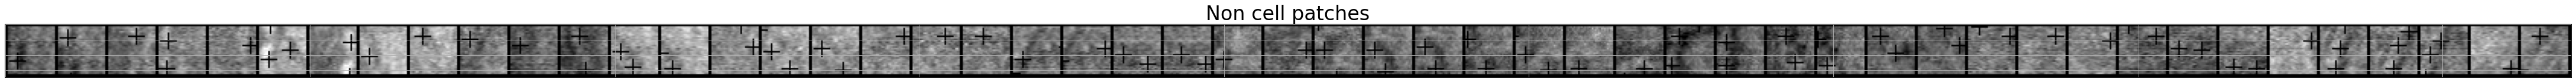

In [21]:
patch_extractor.visualize_patch_extraction(figsize=(10, 25))

### Temporal patches

Temporal patches shape with temporal width = 4: (843, 21, 21, 9)
Temporal patches shape with temporal width = 5: (736, 21, 21, 11)
Temporal patches shape with temporal width = 6: (627, 21, 21, 13)
As temporal window becomes bigger notice that there are less patches.


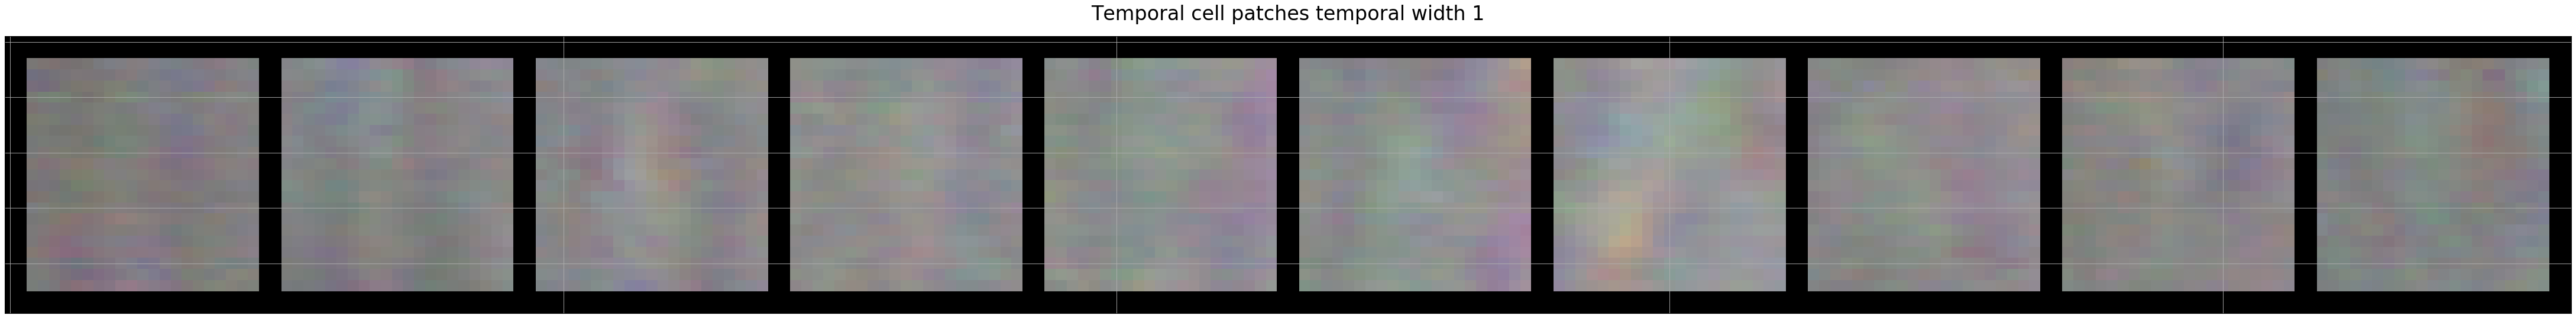

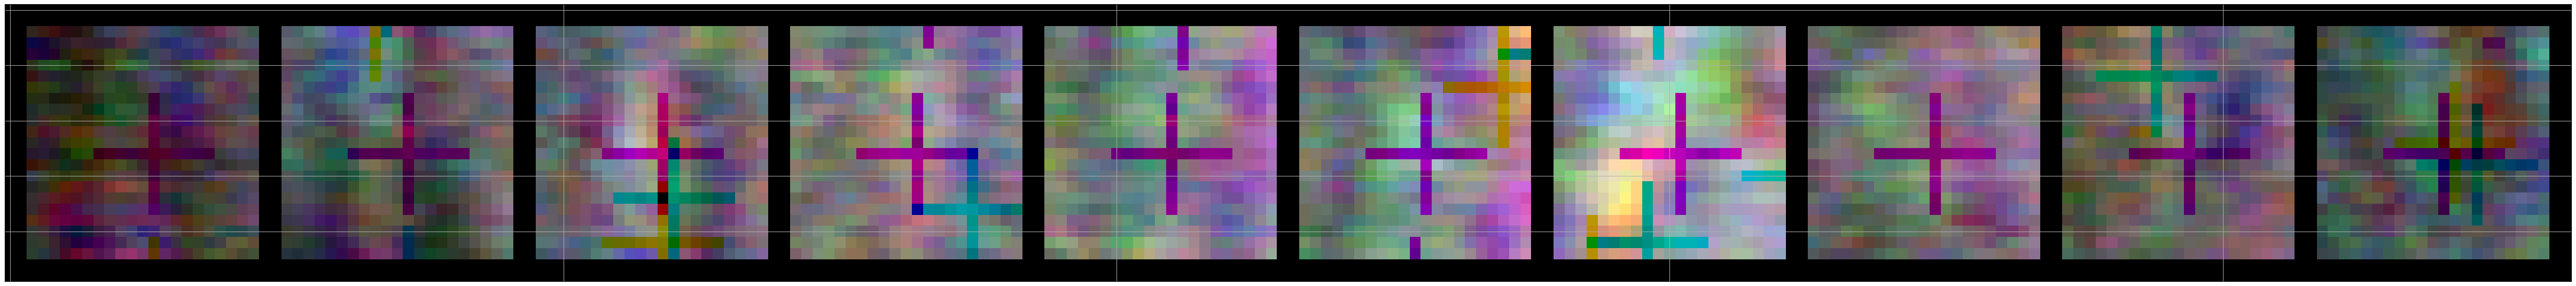

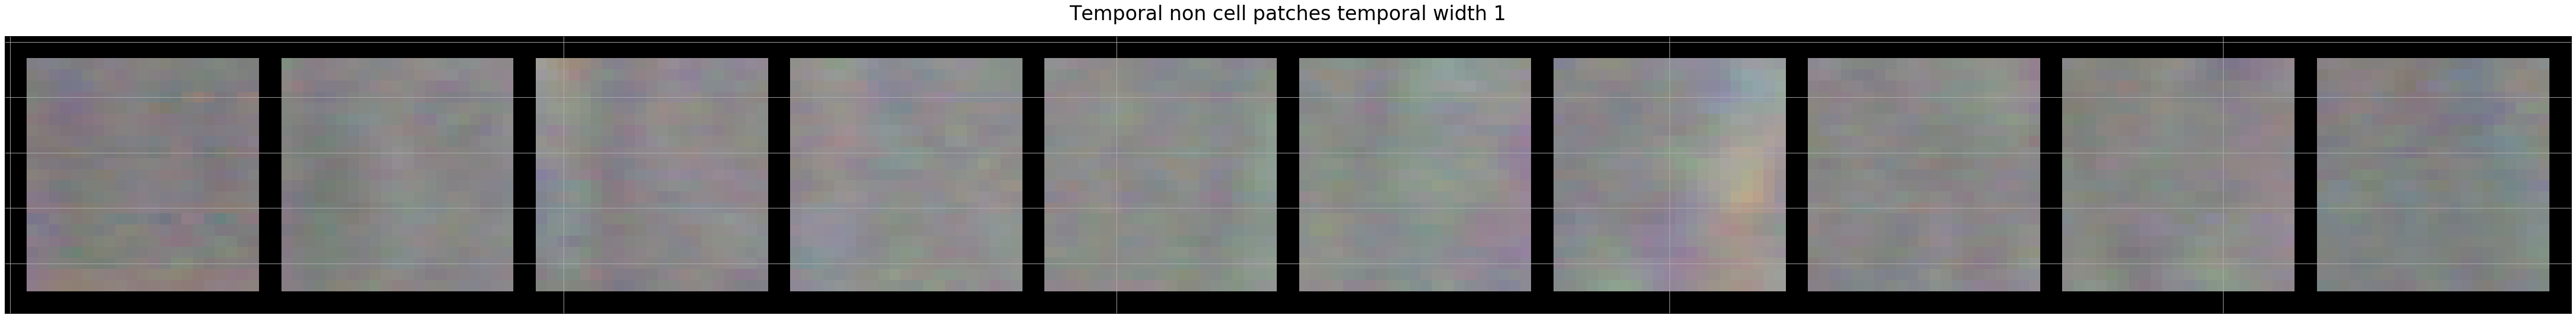

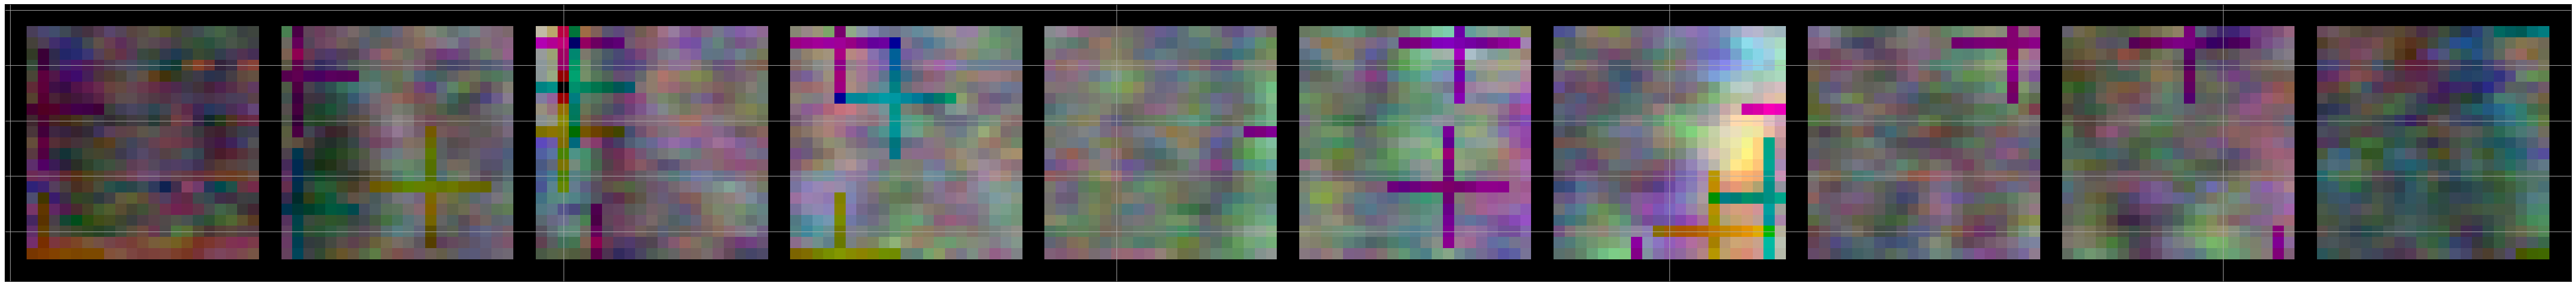

In [39]:
from sharedvariables import get_video_sessions
from patchextraction import SessionPatchExtractor
from plotutils import plot_images_as_grid

video_sessions = get_video_sessions(should_have_marked_cells=True)
vs = video_sessions[0]

patch_extractor = SessionPatchExtractor(vs, patch_size=21, temporal_width=1)

plot_images_as_grid(patch_extractor.temporal_cell_patches_oa790[:10], title='Temporal cell patches temporal width 1')
plot_images_as_grid(patch_extractor.temporal_marked_cell_patches_oa790[:10])

plot_images_as_grid(patch_extractor.temporal_non_cell_patches_oa790[:10], title='Temporal non cell patches temporal width 1')
plot_images_as_grid(patch_extractor.temporal_marked_non_cell_patches_oa790[:10])

# A higher temporal width will give patches with more channells
patch_extractor.temporal_width = 4
print(f'Temporal patches shape with temporal width = 4: {patch_extractor.temporal_cell_patches_oa790.shape}')
patch_extractor.temporal_width = 5
print(f'Temporal patches shape with temporal width = 5: {patch_extractor.temporal_cell_patches_oa790.shape}')
patch_extractor.temporal_width = 6
print(f'Temporal patches shape with temporal width = 6: {patch_extractor.temporal_cell_patches_oa790.shape}')
print(f'As temporal window becomes bigger notice that there are less patches.')

### Mixed channel patches
 
Mixed channel patches give patches with 3 channels, the first channel is confocal video patch, second channel is from the oa780 channel,
third channel is from the oa850 channel.

The confocal video and the oa790 channel have the capillaries at the same position. The oa850 video has a vertical displacement, the video is registered before extracting the patches.

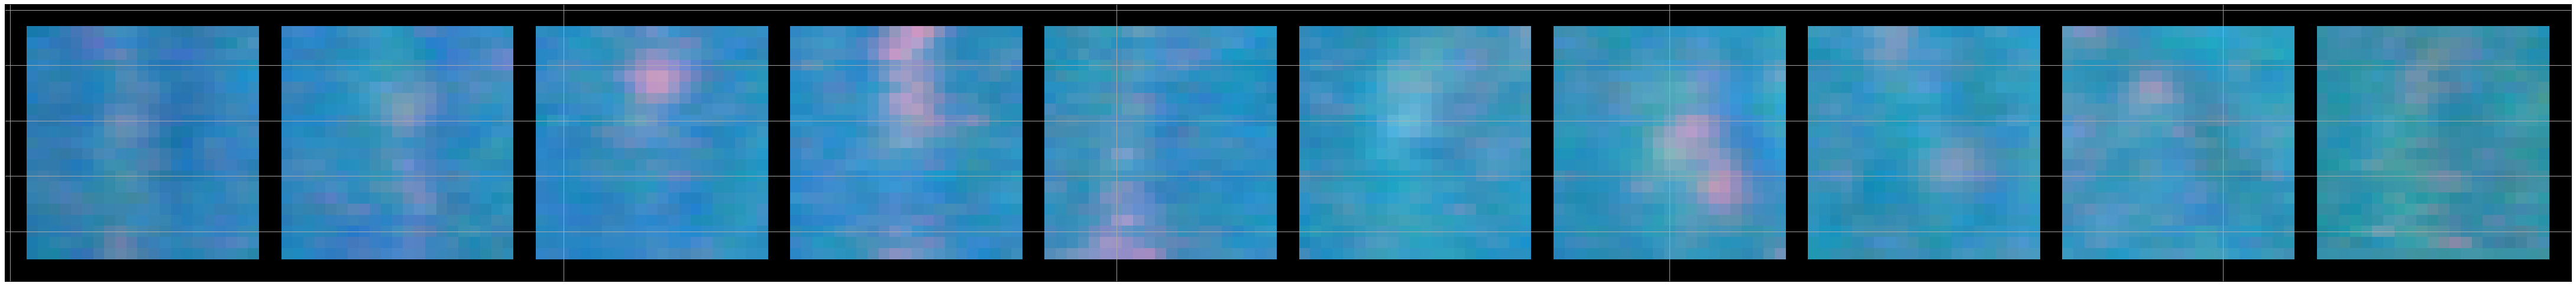

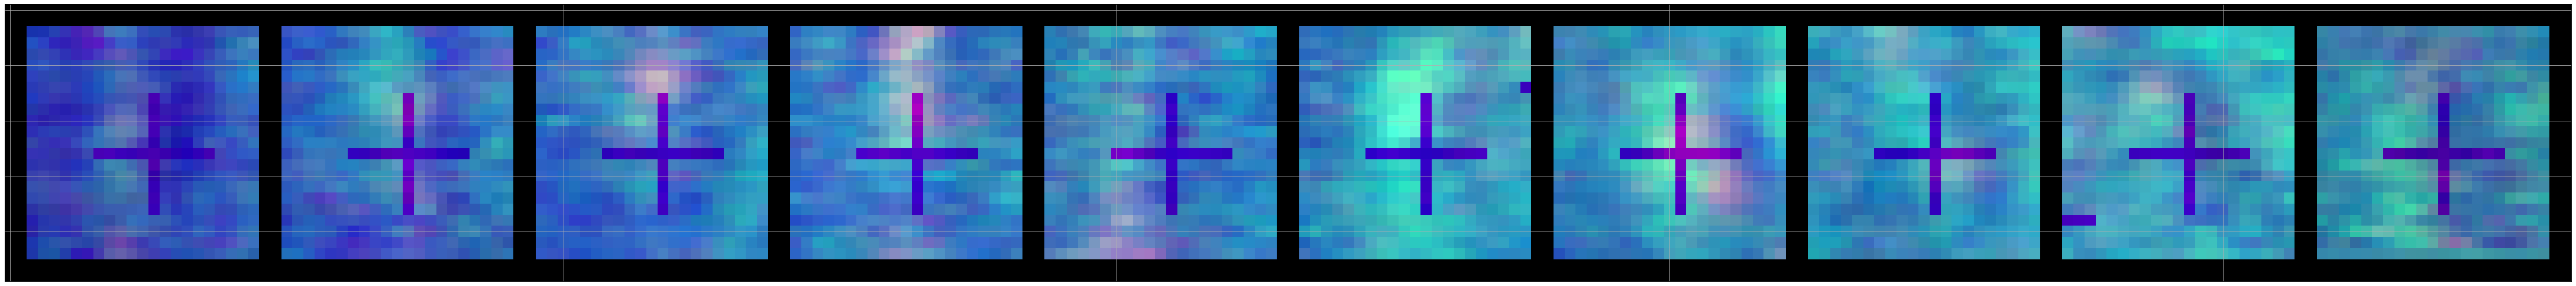

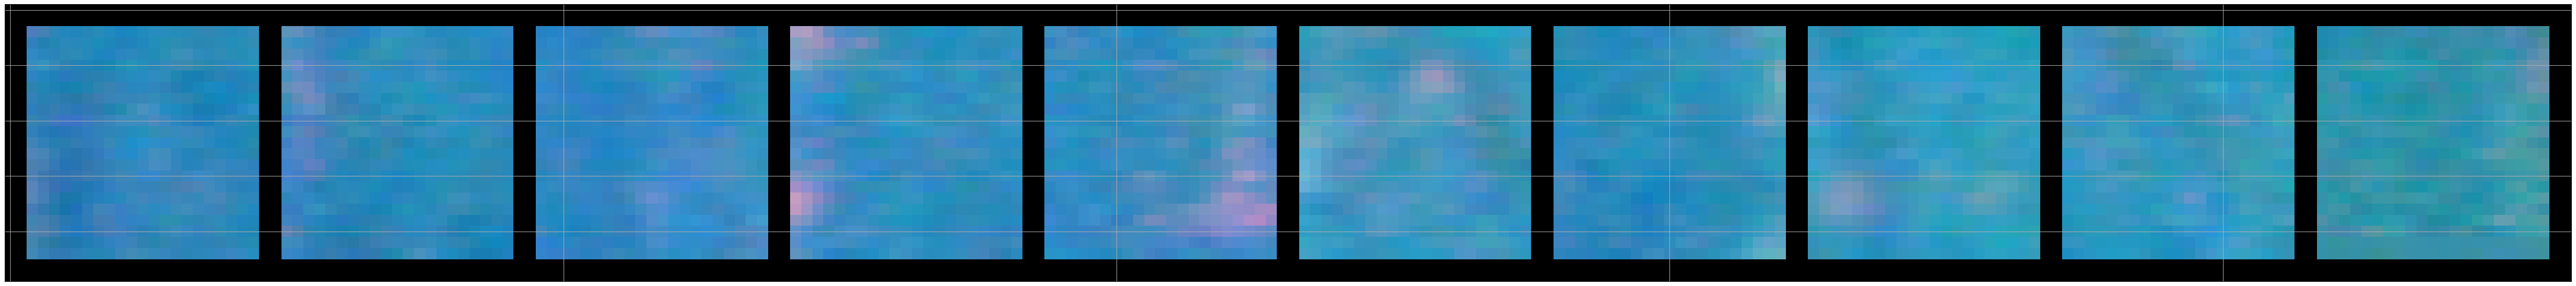

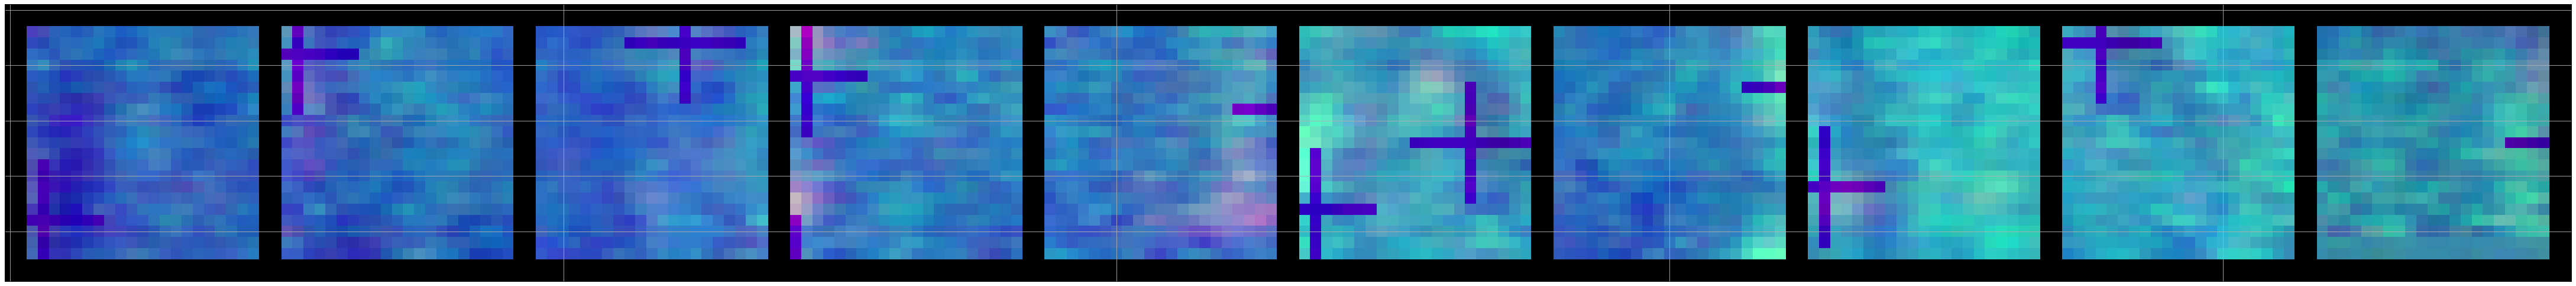

In [41]:
from sharedvariables import get_video_sessions
from patchextraction import SessionPatchExtractor
from plotutils import plot_images_as_grid

video_sessions = get_video_sessions(should_have_marked_cells=True)
vs = video_sessions[0]

patch_extractor = SessionPatchExtractor(vs, patch_size=21)

plot_images_as_grid(patch_extractor.mixed_channel_cell_patches[:10])
plot_images_as_grid(patch_extractor.mixed_channel_marked_cell_patches[:10])

plot_images_as_grid(patch_extractor.mixed_channel_non_cell_patches[:10])
plot_images_as_grid(patch_extractor.mixed_channel_marked_non_cell_patches[:10])

# Create dataset convenience functions

Extract all patches (marked and unmarkded) for all the video session given.

If no video sessions given then all the video sessions automatically created from the videos with cell position csv in the data folder are used.

## Normal patches

  0%|          | 0/8 [00:00<?, ?it/s]

Creating cell and no cell images from videos and cell positions csvs...


100%|██████████| 8/8 [00:03<00:00,  2.17it/s]


Created 12131 cell patches and 12367 non cell patches


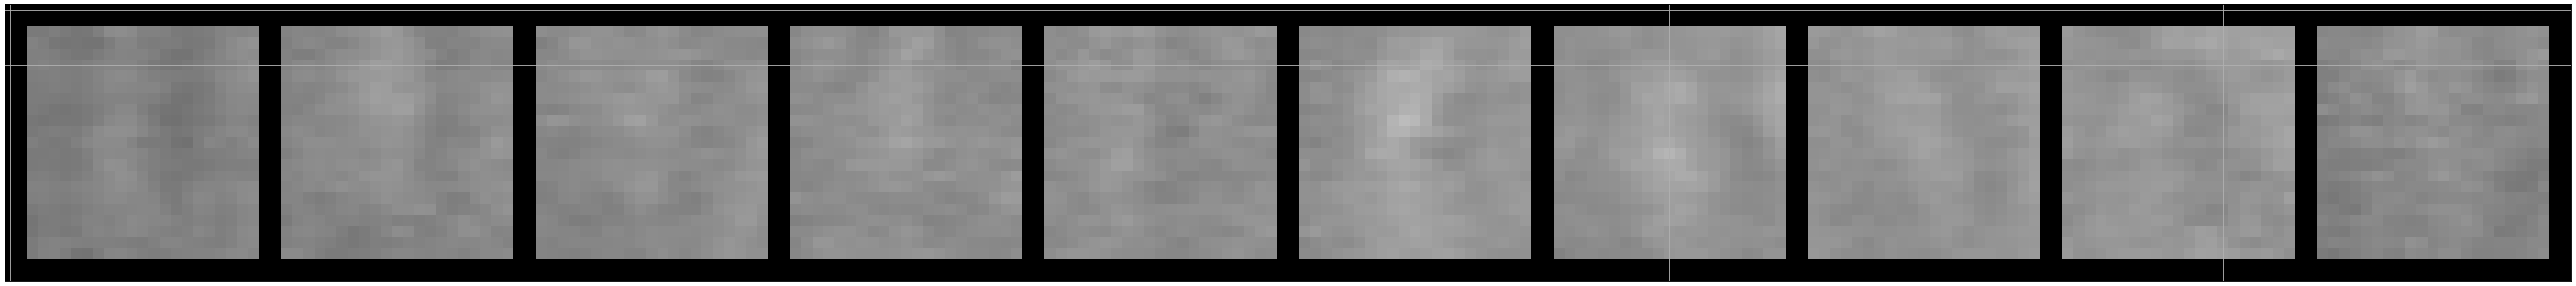

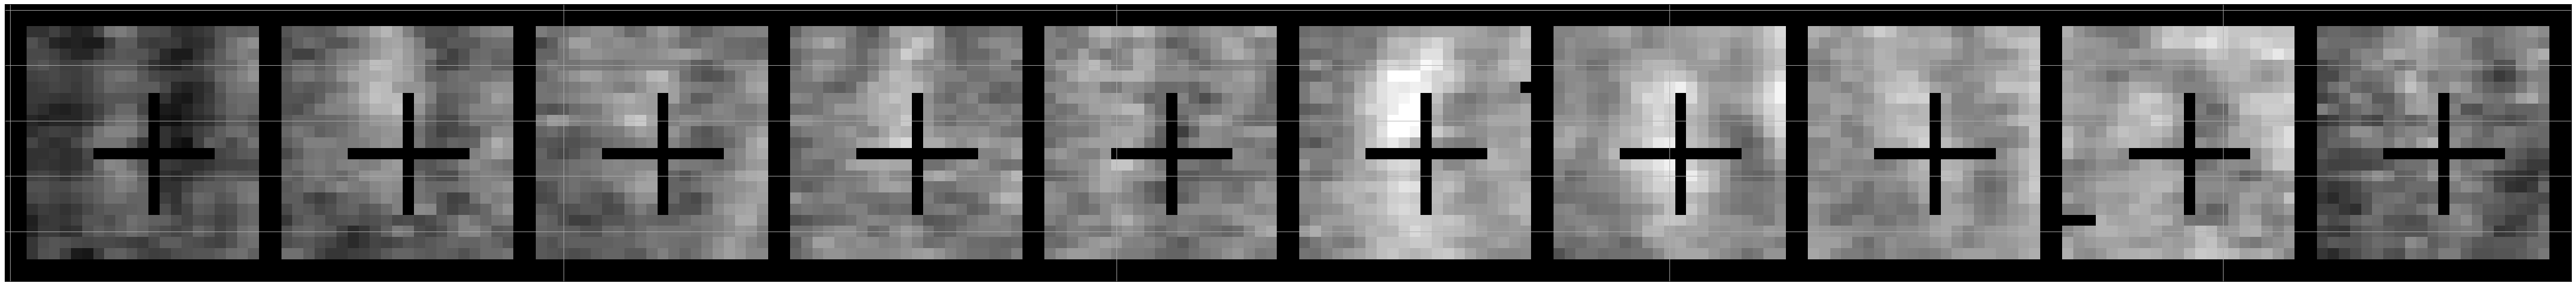

In [46]:
from generate_datasets import create_cell_and_no_cell_patches, create_dataset_from_cell_and_no_cell_images
from imageprosessing import hist_match_images
from sharedvariables import get_video_sessions

reg_video_sessions = get_video_sessions(should_have_marked_cells=True, should_be_registered=True)

cell_images, non_cell_images, cell_images_marked, non_cell_images_marked =\
create_cell_and_no_cell_patches(
    video_sessions=reg_video_sessions,                                                                  
    n_negatives_per_positive=1,                                                                                                
    v=True,
    vv=False
)

plot_images_as_grid(cell_images[:10])
plot_images_as_grid(cell_images_marked[:10])

## Temporal patches

100%|██████████| 8/8 [00:03<00:00,  2.30it/s]


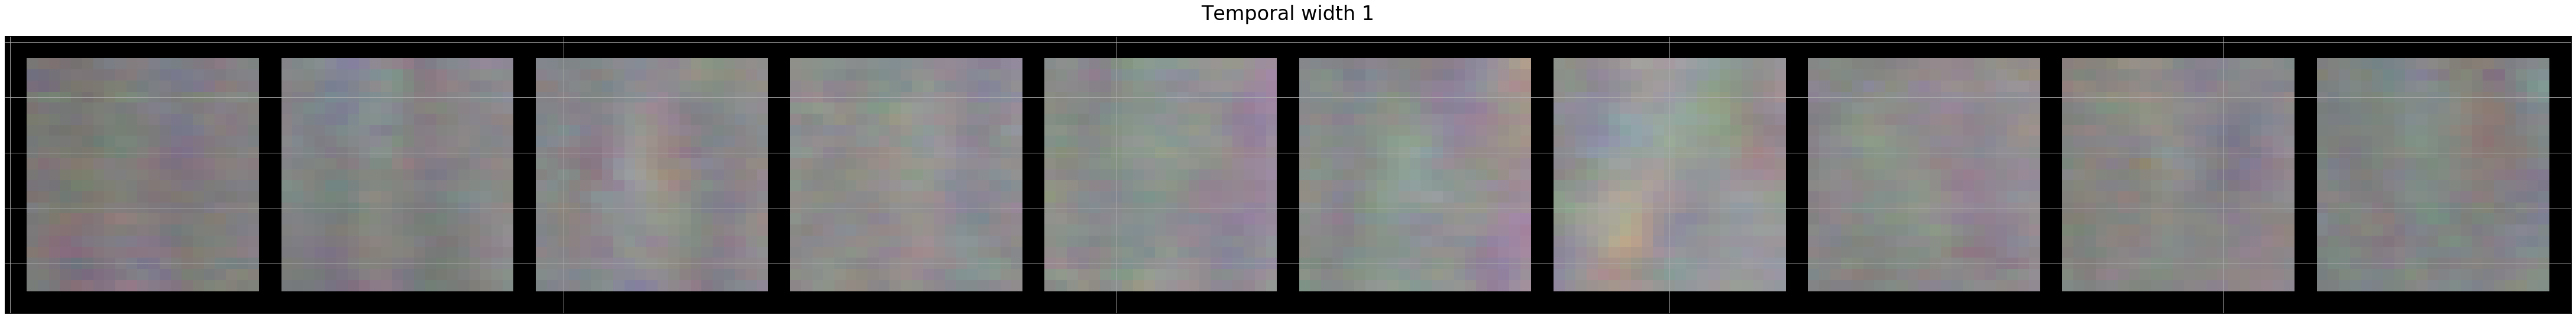

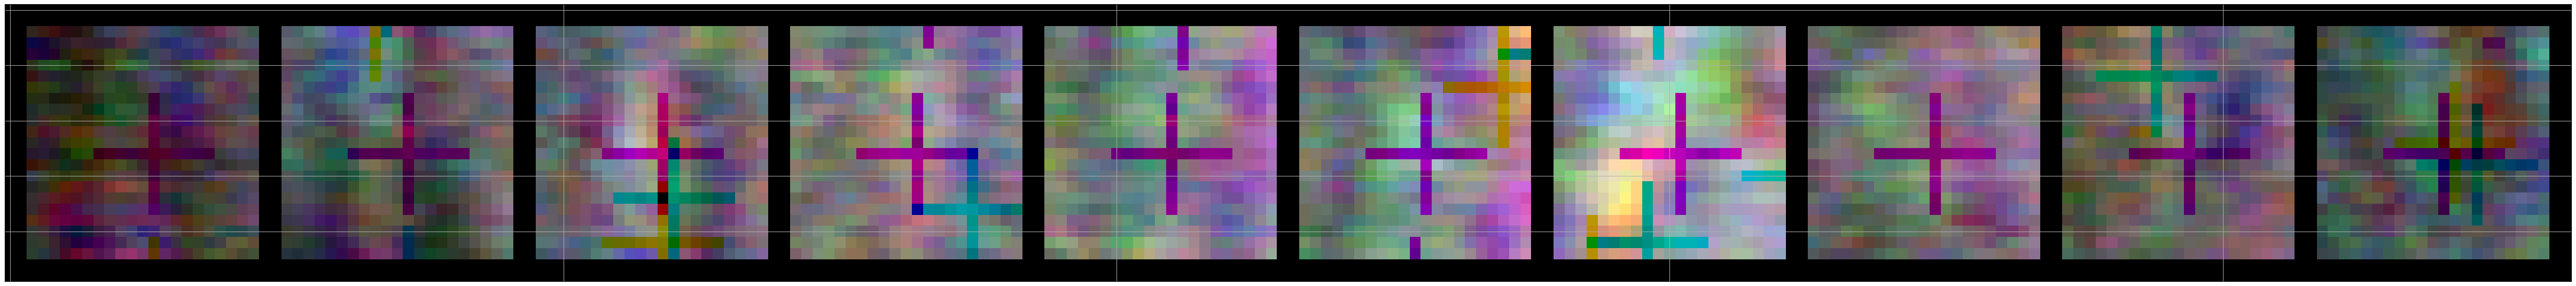

In [48]:
from generate_datasets import create_cell_and_no_cell_patches, create_dataset_from_cell_and_no_cell_images
from imageprosessing import hist_match_images
from sharedvariables import get_video_sessions

reg_video_sessions = get_video_sessions(should_have_marked_cells=True, should_be_registered=True)
cell_images, non_cell_images, cell_images_marked, non_cell_images_marked =\
create_cell_and_no_cell_patches(
    temporal_width=1,
    video_sessions=reg_video_sessions,                                                                                                                                                                
)

plot_images_as_grid(cell_images[:10], title='Temporal width 1')
plot_images_as_grid(cell_images_marked[:10])

## Mixed channel patches

100%|██████████| 8/8 [00:27<00:00,  3.39s/it]


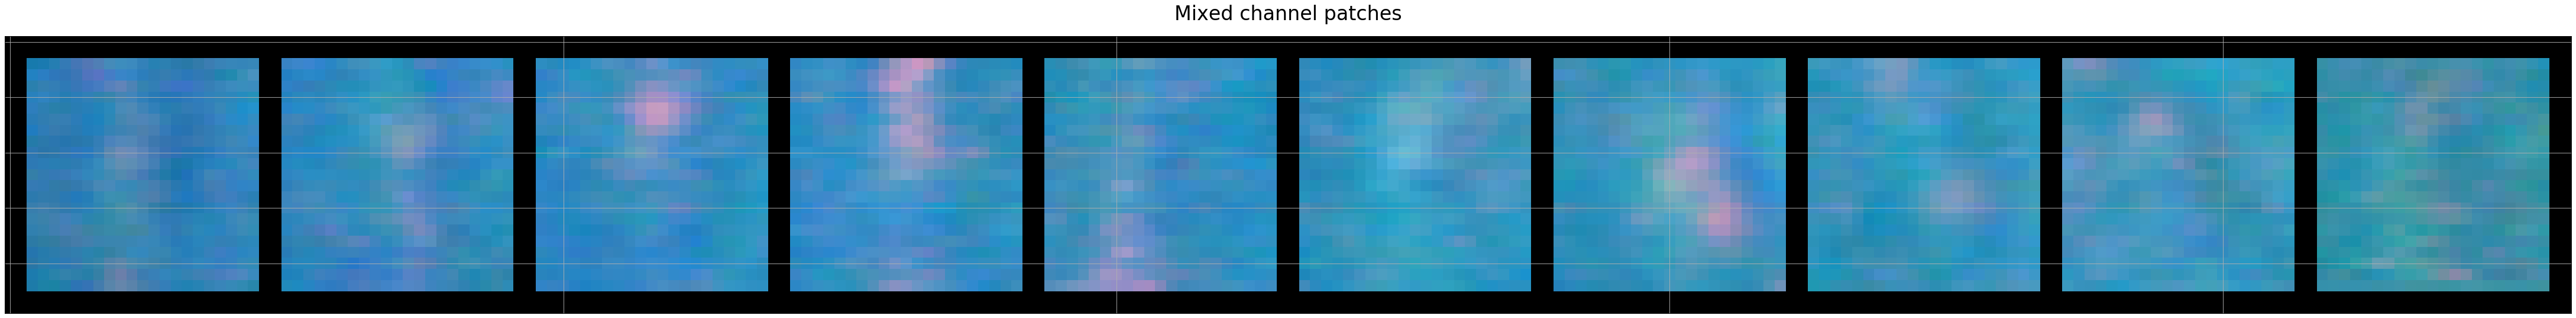

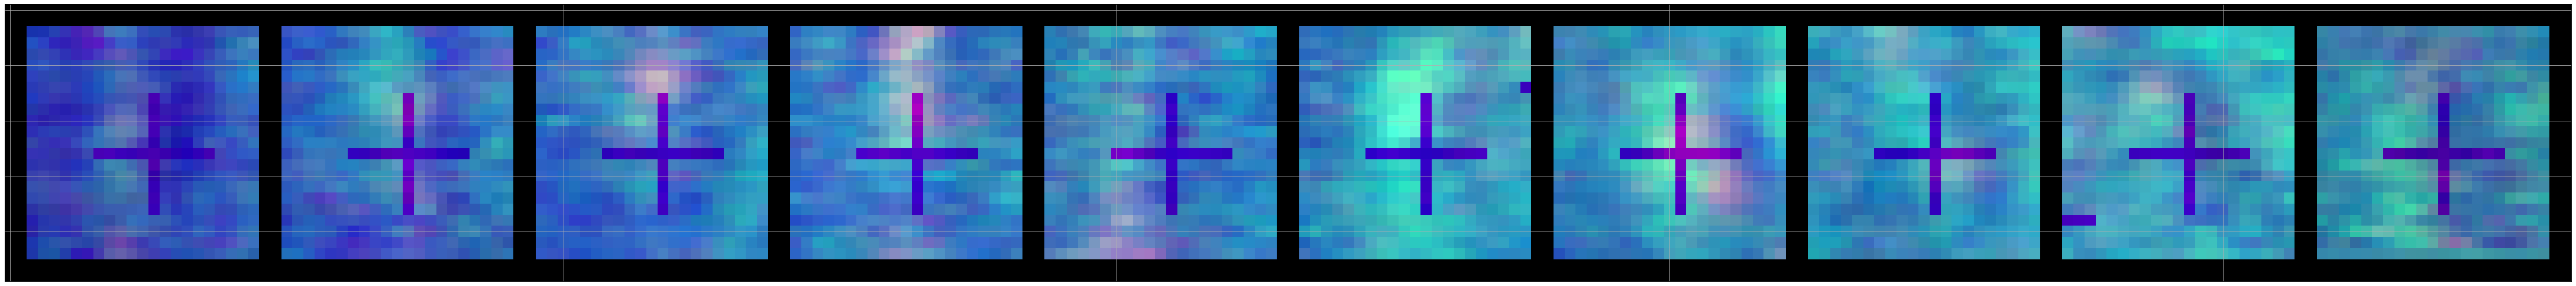

In [5]:
from generate_datasets import create_cell_and_no_cell_patches, create_dataset_from_cell_and_no_cell_images
from imageprosessing import hist_match_images
from sharedvariables import get_video_sessions
from plotutils import plot_images_as_grid

reg_video_sessions = get_video_sessions(should_have_marked_cells=True, should_be_registered=True)
cell_images, non_cell_images, cell_images_marked, non_cell_images_marked =\
create_cell_and_no_cell_patches(
    mixed_channel_patches=True,
    video_sessions=reg_video_sessions,                                                                                                                                                                
)

plot_images_as_grid(cell_images[:10], title='Mixed channel patches')
plot_images_as_grid(cell_images_marked[:10])

# Training Experiments

## Histogram matching

In [11]:
from generate_datasets import create_cell_and_no_cell_patches, create_dataset_from_cell_and_no_cell_images
from imageprosessing import hist_match_images
from sharedvariables import get_video_sessions
from plotutils import plot_images_as_grid

reg_video_sessions = get_video_sessions(should_have_marked_cells=True, should_be_registered=True)
cell_images, non_cell_images, cell_images_marked, non_cell_images_marked =\
create_cell_and_no_cell_patches(
    video_sessions=reg_video_sessions,                                                                                                                                                                
)

100%|██████████| 8/8 [00:03<00:00,  2.21it/s]


In [12]:
from imageprosessing import hist_match_images

def get_highest_contrast_frame(video_sessions):
    max_diff = 0
    max_diff_idx = 0
    for i, vs in enumerate(video_sessions):
        vs.mask_frames_oa790 = crop_mask(vs.mask_frames_oa790, 15)
        diff = vs.masked_frames_oa790[0].max() - vs.masked_frames_oa790[0].min()
        if diff > max_diff:
            max_diff_idx = i
            max_diff = diff
            
    highest_contrast_frame = video_sessions[max_diff_idx].masked_frames_oa790[0]
    highest_contrast_frame = highest_contrast_frame.filled(highest_contrast_frame.mean())
    
    return highest_contrast_frame

template_frame = get_highest_contrast_frame(reg_video_sessions)

hist_matched_cell_images = hist_match_images(cell_images, template_frame)
hist_matched_non_cell_images = hist_match_images(non_cell_images, template_frame)

100%|██████████| 12367/12367 [01:08<00:00, 180.33it/s]


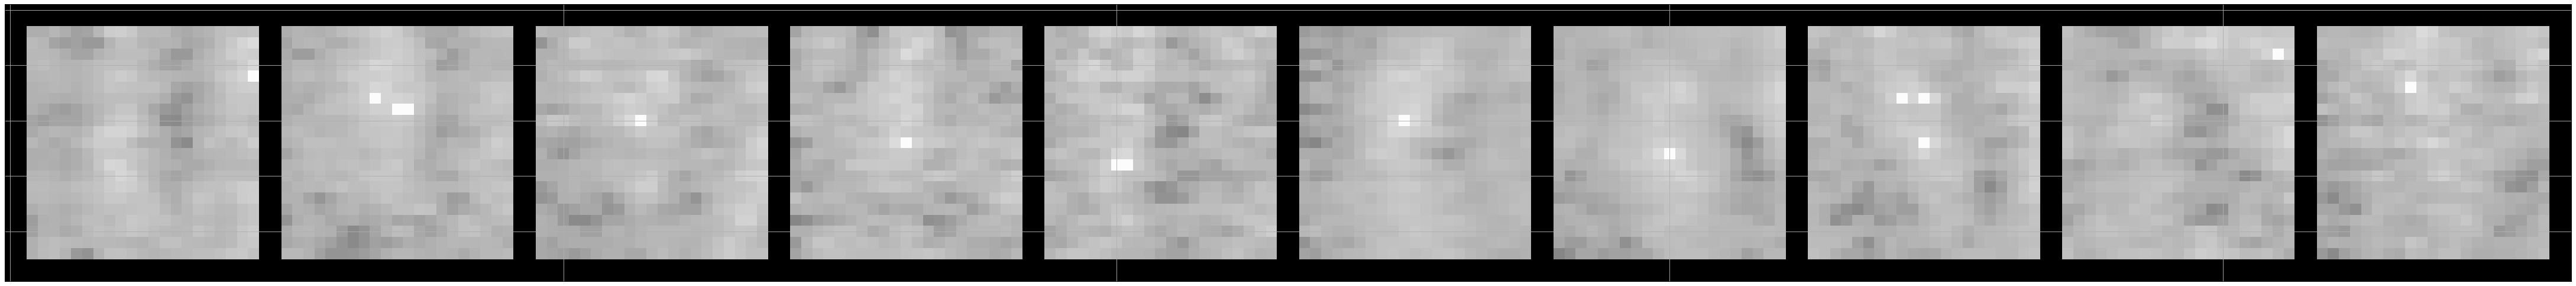

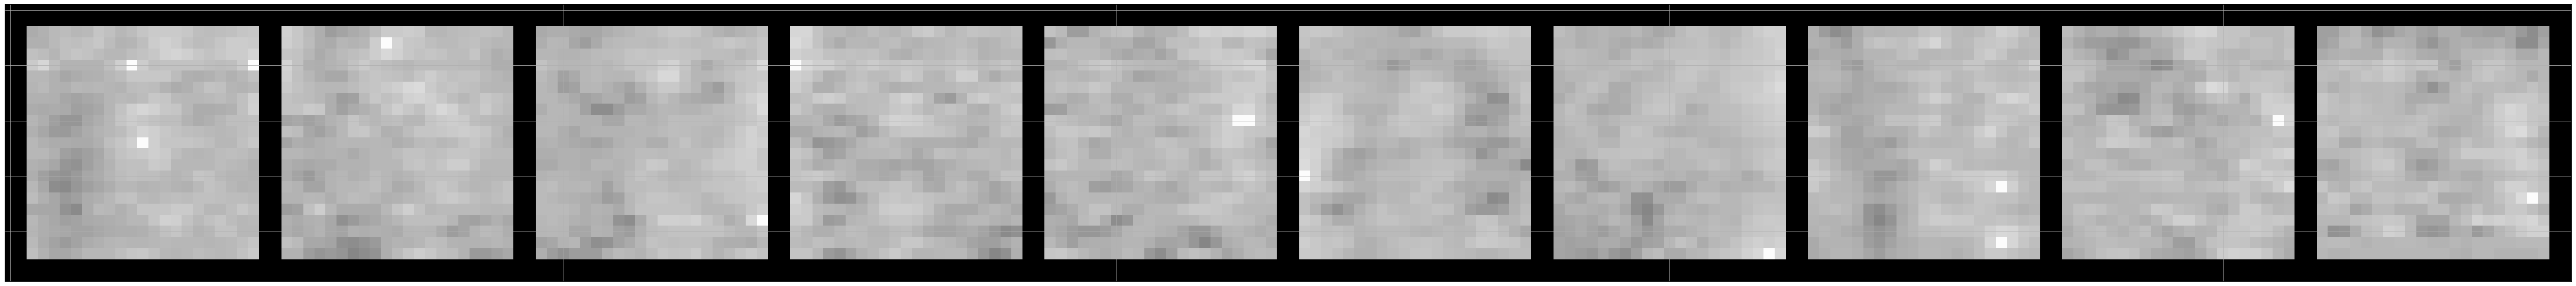

In [13]:
plot_images_as_grid(hist_matched_cell_images[:10])
plot_images_as_grid(hist_matched_non_cell_images[:10])

Hello


In [22]:
import collections
import torch
from cnnlearning import CNN, train, TrainingTracker 

standardize_dataset = True
trainset, validset = create_dataset_from_cell_and_no_cell_images(hist_matched_cell_images, 
                                                                 hist_matched_non_cell_images,
                                                                 validset_ratio=0.2,
                                                                 standardize=True)

model = CNN(dataset_sample=trainset, output_classes=2).to('cuda')
train_params = collections.OrderedDict(
    optimizer=torch.optim.Adam(model.parameters(), lr=.001, weight_decay=0.01),
    batch_size=256,
    do_early_stop=True,  # Optional default True
    early_stop_patience=40,
    learning_rate_scheduler_patience=20,
    epochs=200,
    shuffle=True,
    # valid_untrunsformed_normals = valid_untrunsformed_normals,
    evaluation_epochs=5,
    trainset=trainset,
    validset=validset,
)
results: TrainingTracker = train(model,
                                 train_params,
                                 criterion=torch.nn.CrossEntropyLoss(),
                                 device='cuda')

,Best train acc,train loss,Best train epoch,Best valid acc,valid loss,Best valid epoch
0,0.999,0.000,190,0.817,0.002,40


,lr,wd,batch_size,stop patience,lr patience,epochs,shuffle,Trainset size,Validset size
0,0.000,0.010,256,40,20,200,True,19598,4900


,e,train loss,valid loss,train acc,valid acc,Best loss?,Best Acc?,last loss,last acc,lr,evaluation_epochs
0,0,0.002,0.002,0.807,0.794,True,True,0,0,0.001,5
1,5,0.002,0.002,0.787,0.781,False,False,1,1,0.001,5
2,10,0.002,0.002,0.822,0.799,True,True,0,0,0.001,5
...,...,...,...,...,...,...,...,...,...,...,...
38,190,0.000,0.003,0.999,0.790,False,False,34,30,0.000,5
39,195,0.000,0.003,0.999,0.783,False,False,35,31,0.000,5
40,199,0.000,0.003,0.999,0.783,False,False,36,32,0.000,5


100%|██████████| 200/200 [08:54<00:00,  2.67s/it]

Run duration  534.6337010860443


In [ ]:
from classificationutils import classify_labeled_dataset, classify_images

model = results.recorded_model
model.eval()

_, train_accuracy = classify_labeled_dataset(trainset, model)
_, valid_accuracy = classify_labeled_dataset(validset, model)
positive_accuracy = classify_images(cell_images, model, standardize_dataset=standardize_dataset).sum().item() / len(cell_images)
negative_accuracy = (1 - classify_images(non_cell_images, model, standardize_dataset=standardize_dataset)).sum().item() / len(non_cell_images)

print()
print(f'Model trained on {len(cell_images)} cell patches and {len(non_cell_images)} non cell patches.')
print()
print('Brief evaluation - best validation accuracy model')
print('----------------')
print(f'Epoch:\t', results.recorded_model_epoch)
print('Training accuracy:\t', f'{train_accuracy:.3f}')
print('Validation accuracy:\t', f'{valid_accuracy:.3f}')
print()
print('Positive accuracy:\t', f'{positive_accuracy:.3f}')
print('Negative accuracy:\t', f'{negative_accuracy:.3f}')

train_model = results.recorded_train_model
train_model.eval()

_, train_accuracy = classify_labeled_dataset(trainset, train_model)
_, valid_accuracy = classify_labeled_dataset(validset, train_model)
positive_accuracy = classify_images(cell_images, train_model, standardize_dataset=standardize_dataset).sum().item() / len(cell_images)
negative_accuracy = (1 - classify_images(non_cell_images, train_model, standardize_dataset=standardize_dataset)).sum().item() / len(non_cell_images)

print()
print('Brief evaluation - best training accuracy model')
print('----------------')
print(f'Epoch:\t', results.recorded_train_model_epoch)
print('Training accuracy:\t', f'{train_accuracy:.3f}')
print('Validation accuracy:\t', f'{valid_accuracy:.3f}')
print()
print('Positive accuracy:\t', f'{positive_accuracy:.3f}')
print('Negative accuracy:\t', f'{negative_accuracy:.3f}')

In [ ]:
from plotutils import plot_images_as_grid
from generate_datasets import create_cell_and_no_cell_patches, create_dataset_from_cell_and_no_cell_images
from imageprosessing import hist_match_images
from sharedvariables import get_video_sessions
from imageprosessing import SessionPreprocessor, enhance_motion_contrast

reg_video_sessions = get_video_sessions(should_have_marked_cells=True, should_be_registered=True)

for vs in reg_video_sessions:
    pr = SessionPreprocessor(vs, [
        enhance_motion_contrast
    ])
    pr.apply_preprocessing()
    
cell_images_reg, non_cell_images_reg, _, _ = create_cell_and_no_cell_patches(
    video_sessions=reg_video_sessions,
    normalize=False,                                                                             
    n_negatives_per_positive=1,                                                                                                
    v=True,
    vv=False
)

In [ ]:
from plotutils import plot_images_as_grid
plot_images_as_grid(cell_images_reg)
plot_images_as_grid(non_cell_images_reg)

In [ ]:
import collections
import torch
from cnnlearning import CNN, train, TrainingTracker 

trainset, validset = create_dataset_from_cell_and_no_cell_images(cell_images, non_cell_images, standardize=True)
model = CNN(dataset_sample=trainset, output_classes=2).to('cuda')
train_params = collections.OrderedDict(
    optimizer=torch.optim.Adam(model.parameters(), lr=.001, weight_decay=5e-4),
    batch_size=1024 * 7,
    do_early_stop=True,  # Optional default True
    early_stop_patience=80,
    learning_rate_scheduler_patience=100,
    epochs=700,
    shuffle=True,
    # valid_untrunsformed_normals = valid_untrunsformed_normals,
    evaluation_epochs=50,
    trainset=trainset,
    validset=validset,
)
results: TrainingTracker = train(model,
                                 train_params,
                                 criterion=torch.nn.CrossEntropyLoss(),
                                 device='cuda')

In [ ]:
from classificationutils import classify_labeled_dataset, classify_images

model = results.recorded_model
model.eval()

_, train_accuracy = classify_labeled_dataset(trainset, model)
_, valid_accuracy = classify_labeled_dataset(validset, model)
positive_accuracy = classify_images(cell_images, model, standardize_dataset=standardize_dataset).sum().item() / len(cell_images)
negative_accuracy = (1 - classify_images(non_cell_images, model, standardize_dataset=standardize_dataset)).sum().item() / len(non_cell_images)

print()
print(f'Model trained on {len(cell_images)} cell patches and {len(non_cell_images)} non cell patches.')
print()
print('Brief evaluation - best validation accuracy model')
print('----------------')
print(f'Epoch:\t', results.recorded_model_epoch)
print('Training accuracy:\t', f'{train_accuracy:.3f}')
print('Validation accuracy:\t', f'{valid_accuracy:.3f}')
print()
print('Positive accuracy:\t', f'{positive_accuracy:.3f}')
print('Negative accuracy:\t', f'{negative_accuracy:.3f}')

train_model = results.recorded_train_model
train_model.eval()

_, train_accuracy = classify_labeled_dataset(trainset, train_model)
_, valid_accuracy = classify_labeled_dataset(validset, train_model)
positive_accuracy = classify_images(cell_images, train_model, standardize_dataset=standardize_dataset).sum().item() / len(cell_images)
negative_accuracy = (1 - classify_images(non_cell_images, train_model, standardize_dataset=standardize_dataset)).sum().item() / len(non_cell_images)

print()
print('Brief evaluation - best training accuracy model')
print('----------------')
print(f'Epoch:\t', results.recorded_train_model_epoch)
print('Training accuracy:\t', f'{train_accuracy:.3f}')
print('Validation accuracy:\t', f'{valid_accuracy:.3f}')
print()
print('Positive accuracy:\t', f'{positive_accuracy:.3f}')
print('Negative accuracy:\t', f'{negative_accuracy:.3f}')

### Applying preprocessing to session frames

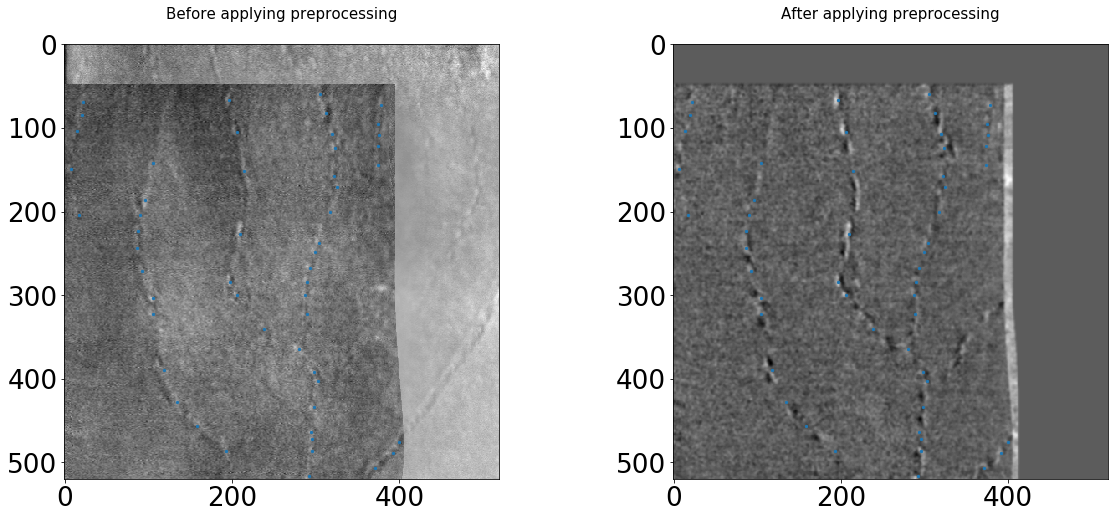

In [31]:
from sharedvariables import get_video_sessions
from imageprosessing import SessionPreprocessor, enhance_motion_contrast

video_sessions = get_video_sessions(should_have_marked_cells=True, should_be_registered=True)
vs = video_sessions[3]

preprocessor = SessionPreprocessor(vs, lambda frames: enhance_motion_contrast(frames, sigma=1.2))

plt.subplot(121)
plt.imshow(vs.frames_oa790[0])
plt.scatter(vs.cell_positions[0][:, 0], vs.cell_positions[0][:, 1], s=5)
plt.title('Before applying preprocessing', fontsize=15)

preprocessor.apply_preprocessing()

plt.subplot(122)
plt.imshow(vs.frames_oa790[0])
plt.scatter(vs.cell_positions[0][:, 0], vs.cell_positions[0][:, 1],  s=5)

plt.title('After applying preprocessing', fontsize=15)
pass

### Apply motion contrast enhancement to all video sessions

In [1]:
from sharedvariables import get_video_sessions
from imageprosessing import SessionPreprocessor, enhance_motion_contrast
import tqdm
video_sessions_enhanced = get_video_sessions(should_have_marked_cells=True, should_be_registered=True)

for vs in tqdm.tqdm(video_sessions_enhanced):
    preprocessor = SessionPreprocessor(vs, lambda frames: enhance_motion_contrast(frames, sigma=1))
    preprocessor.apply_preprocessing()

100%|██████████| 8/8 [01:59<00:00, 14.95s/it]


In [4]:
from generate_datasets import create_cell_and_no_cell_patches
cell_images_enhanced, non_cell_images_enhanced, cell_images_marked, non_cell_images_marked =\
create_cell_and_no_cell_patches(
    video_sessions=video_sessions_enhanced
)

100%|██████████| 8/8 [00:01<00:00,  4.87it/s]


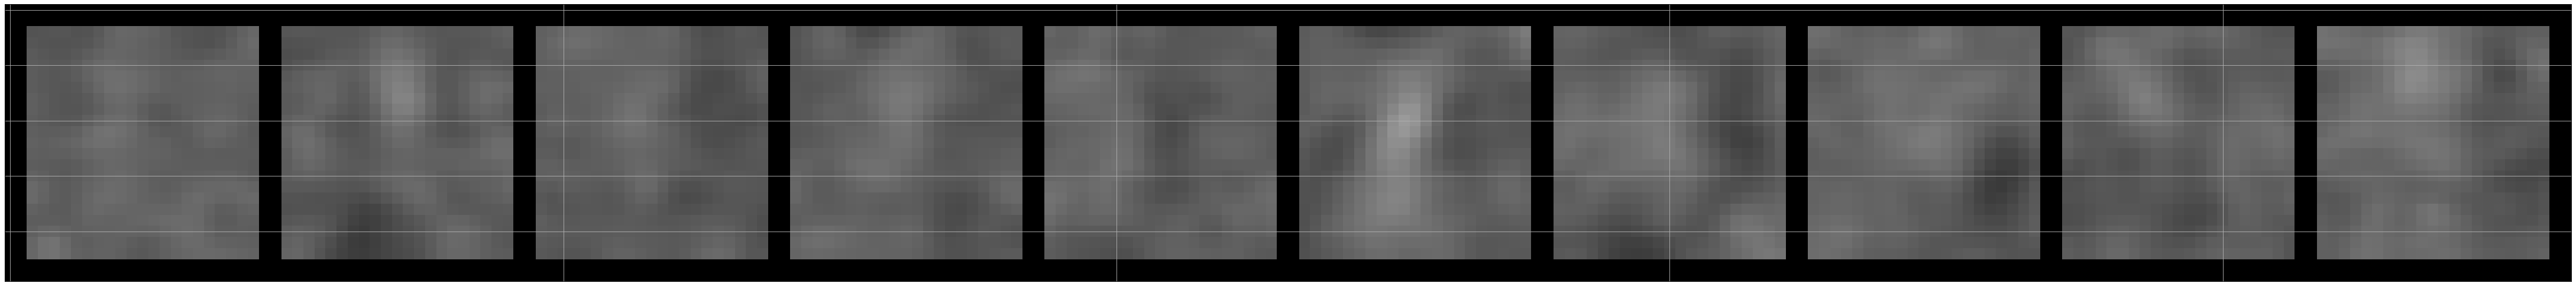

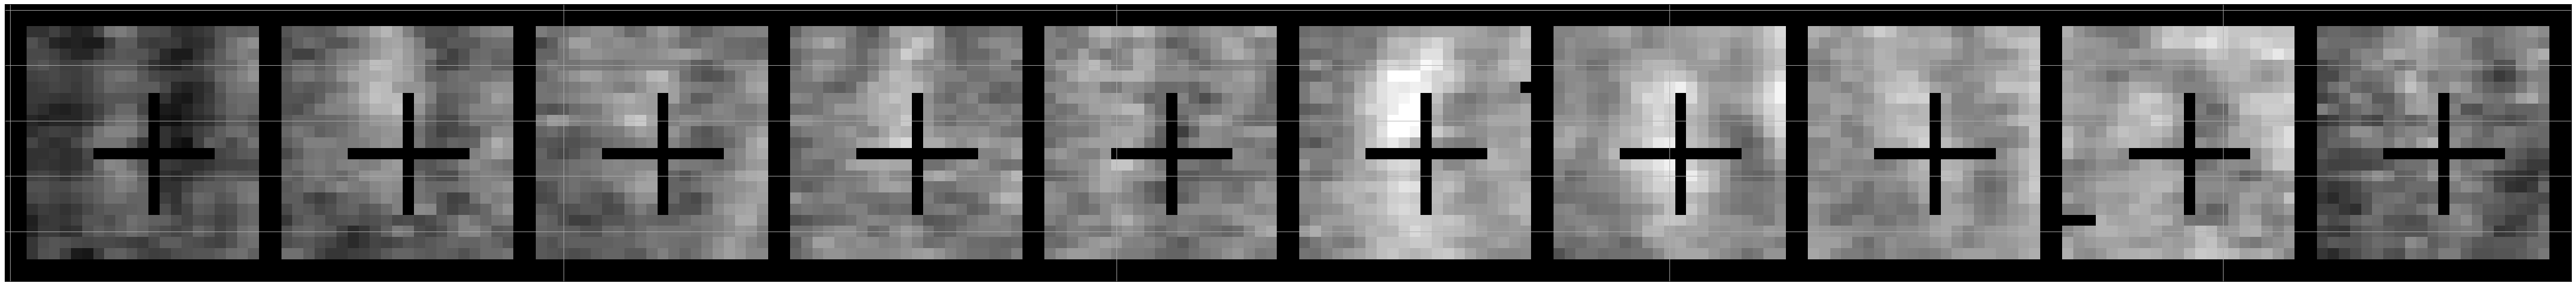

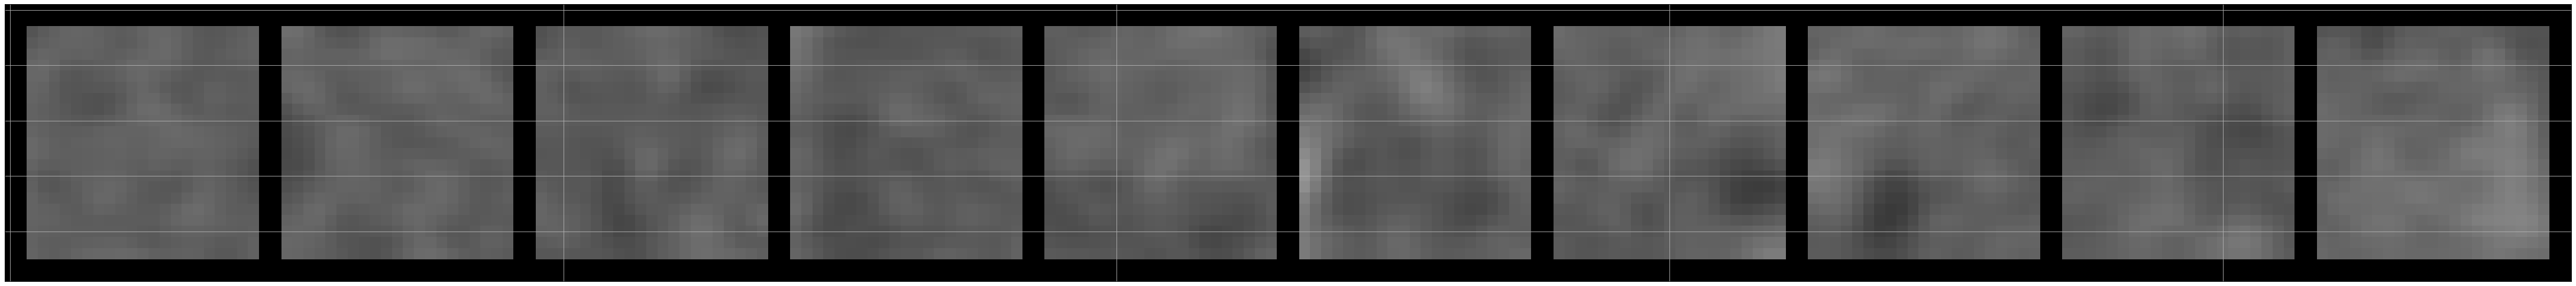

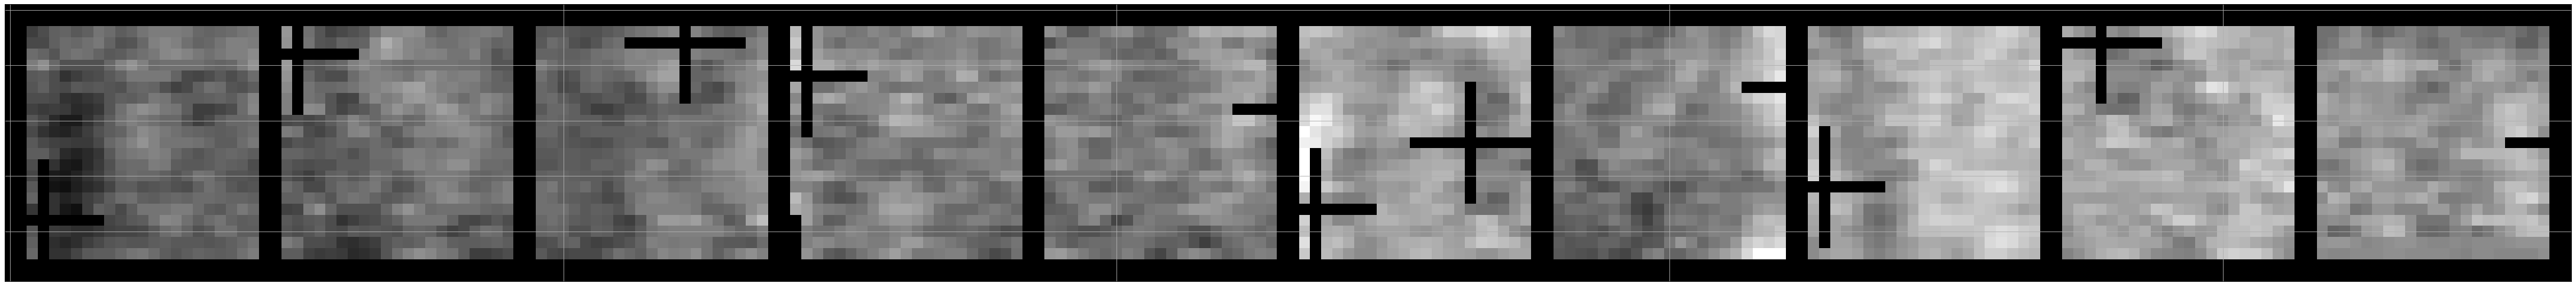

In [6]:
from plotutils import plot_images_as_grid
plot_images_as_grid(cell_images_enhanced[:10])
plot_images_as_grid(cell_images_marked[:10])
plot_images_as_grid(non_cell_images_enhanced[:10])
plot_images_as_grid(non_cell_images_marked[:10])

In [8]:
import collections
import torch
from cnnlearning import CNN, train, TrainingTracker 
from generate_datasets import create_dataset_from_cell_and_no_cell_images

trainset, validset = create_dataset_from_cell_and_no_cell_images(cell_images_enhanced, 
                                                                 non_cell_images_enhanced,
                                                                 standardize=True)
model = CNN(dataset_sample=trainset, output_classes=2).to('cuda')
train_params = collections.OrderedDict(
    epochs=250,
    lr = .001,
    
    weight_decay=0.01,
    batch_size='all', # can be a number or None/'all' to train all trainset at once. 
    do_early_stop=True,  # Optional default True
    early_stop_patience=60, # How many epochs with no validation accuracy improvement before stopping early
    learning_rate_scheduler_patience=20, # How many epochs with no validation accuracy improvement before lowering learning rate
    evaluate_epochs=10,
    
    trainset=trainset,
    validset=validset,
    shuffle=True)
results: TrainingTracker = train(model,
                                 train_params,
                                 criterion=torch.nn.CrossEntropyLoss(),
                                 device='cuda')

,Best train acc,train loss,Best train epoch,Best valid acc,valid loss,Best valid epoch
0,0.79727,0.000023,200,0.721546,0.000118,120


,lr,wd,epochs,batch_size,stop patience,lr patience,Trainset size,Validset size,shuffle
0,0.001,0.01,250,all,60,20,19045,4762,True


,e,train loss,valid loss,train acc,valid acc,Best loss?,Best Acc?,last loss,last acc,lr
0,0,0.000037,0.000146,0.493253,0.502100,True,True,0,0,0.001
1,20,0.000036,0.000143,0.641533,0.648677,True,True,0,0,0.001
2,40,0.000033,0.000132,0.638803,0.639857,True,False,0,1,0.001
...,...,...,...,...,...,...,...,...,...,...
11,220,0.000031,0.000162,0.737149,0.684586,False,False,5,5,0.001
12,240,0.000025,0.000139,0.769336,0.695716,False,False,6,6,0.001
13,249,0.000033,0.000181,0.715306,0.652877,False,False,7,7,0.001


100%|██████████| 250/250 [07:53<00:00,  1.89s/it]

Run duration  473.2588973045349


In [ ]:
from sharedvariables import get_video_sessions
from imageprosessing import SessionPreprocessor, enhance_motion_contrast, normalize_data, frame_differencing
import matplotlib.pyplot as plt
import numpy as np

video_sessions = get_video_sessions(should_have_marked_video=True)
vs = video_sessions[0]


preprocessor = SessionPreprocessor(vs, [
    lambda frames: frame_differencing(frames, sigma=1.2),
    lambda frames: np.uint8(normalize_data(frames, (0, 255))),
    lambda frames: enhance_motion_contrast(frames, sigma=1.2)]
                                  )

plt.subplot(121)
plt.imshow(vs.frames_oa790[0])
plt.title('Before applying preprocessing', fontsize=15)

preprocessor.apply_preprocessing_to_oa790()

plt.subplot(122)
plt.imshow(vs.frames_oa790[0])
plt.title('After applying preprocessing', fontsize=15)
pass

In [ ]:
video_sessions = get_video_sessions(should_have_marked_video=True)
vs = video_sessions[0]
plt.imshow(filters.gaussian(vs.masked_frames_oa790[0]))

In [ ]:
blur_images(vs.masked_frames_oa790).max()

In [ ]:
from sharedvariables import get_video_sessions
from imageprosessing import SessionPreprocessor, equalize_adapthist_images
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters

video_sessions = get_video_sessions(should_have_marked_video=True)
vs = video_sessions[0]

def blur_images(frames, sigma=1):
    blurred_images = np.empty_like(frames, dtype=np.float64)
    for i, im in enumerate(frames):
        blurred_images[i] = filters.gaussian(im, sigma)
    return blurred_images

preprocessor = SessionPreprocessor(vs, [
    lambda frames: blur_images(frames, sigma=2),
    lambda frames: np.uint8(frames * 255),
    equalize_adapthist_images,
    lambda frames: np.ma.array([filters.unsharp_mask(f, radius=5, amount=1, preserve_range=True) for f in frames], dtype=np.uint8),
])

_, axes = plt.subplots(1, 2, figsize=(60, 70))
axes[0].imshow(vs.frames_oa790[0], cmap='gray')
axes[0].set_title('Before applying preprocessing', fontsize=15)

preprocessor.apply_preprocessing_to_oa790()

axes[1].imshow(vs.frames_oa790[0], cmap='gray')
axes[1].set_title('After applying preprocessing', fontsize=15)
pass

In [ ]:
for f in [
    lambda frames: frame_differencing(frames, sigma=1.2),
    lambda frames: enhance_motion_contrast(frames, sigma=1.2),
                                       ]:
    print(f)

In [ ]:
from sharedvariables import get_video_sessions
from imageprosessing import SessionPreprocessor, enhance_motion_contrast
import mahotas as mh
video_sessions = get_video_sessions(should_have_marked_video=True)
vs = video_sessions[0]

plt.imshow(mh.gaussian_filter(vs.masked_frames_oa790.mean(0), sigma=2))
# preprocessor = SessionPreprocessor(vs, lambda frames, masks: np.ma.mean(frames, masks))

# plt.subplot(121)
# plt.imshow(vs.frames_oa790[0])
# plt.title('Before applying preprocessing', fontsize=15)

# preprocessor.apply_preprocessing()

# plt.subplot(122)
# plt.imshow(vs.frames_oa790[0])
# plt.title('After applyging preprocessing', fontsize=15)
# pass

In [ ]:
string = 'hey'
import collections
print(isinstance(string, List))
for s in string:
    print(s)

In [ ]:
string = 'Hey'
list(string)

In [ ]:
plt.imshow(frame_differencing(vs.masked_frames_oa790, 2)[3])
frame_differencing(vs.masked_frames_oa790, 2).max()

In [ ]:
video_sessions = get_video_sessions()

vs = [vs for vs in video_sessions if 'shared-videos' in vs.video_file][0]
print(vs)
plt.imshow(vs.frames_oa790[0])
plt.show()
extractor = SessionPatchExtractor(vs, patch_size=21)
preprocessor = SessionPreprocessor(vs, lambda frames, masks: enhance_motion_contrast(frames, masks, sigma=0.125, mask_crop_pixels=0))
preprocessor.apply_preprocessing_to_oa790()
plt.imshow(vs.frames_oa790[0])

In [ ]:
plt.imshow(vs.frames_oa790[23])

In [ ]:
from sharedvariables import get_video_sessions
from imageprosessing import SessionPreprocessor, enhance_motion_contrast
from patchextraction import SessionPatchExtractor

video_sessions = get_video_sessions(should_have_marked_video=True)
vs = video_sessions[0]

extractor = SessionPatchExtractor(vs, patch_size=21)
preprocessor = SessionPreprocessor(vs, lambda frames, masks: enhance_motion_contrast(frames, masks, sigma=1.2, mask_crop_pixels=0))

cell_patches_before_preprocessing = extractor.cell_patches_oa790
non_cell_patches_before_preprocessing = extractor.non_cell_patches_oa790

plt.subplot(121)
plt.imshow(vs.frames_oa790[0])
plt.title('Before applying preprocessing', fontsize=15)
plt.scatter(vs.cell_positions[0][:, 0], vs.cell_positions[0][:, 1])

preprocessor.apply_preprocessing()

extractor._reset_patches()
cell_patches_after_preprocessing = extractor.cell_patches_oa790
non_cell_patches_after_preprocessing = extractor.non_cell_patches_oa790

plt.subplot(122)
plt.imshow(vs.frames_oa790[0])
plt.title('After applying preprocessing', fontsize=15)
pass

In [ ]:
plot_images_as_grid(cell_patches_before_preprocessing[:10])
plot_images_as_grid(non_cell_patches_before_preprocessing[:10])

plot_images_as_grid(cell_patches_after_preprocessing[:10])
plot_images_as_grid(non_cell_patches_after_preprocessing[:10])

In [ ]:
print('Channel oa850')
plot_images_as_grid(patch_extractor.mixed_channel_cell_patches[:10][..., 1])
# plot_images_as_grid(patch_extractor.mixed_channel_marked_cell_patches[:10][..., 1])

plot_images_as_grid(patch_extractor.mixed_channel_non_cell_patches[:10][..., 1])
# plot_images_as_grid(patch_extractor.mixed_channel_marked_non_cell_patches[:10][..., 1])

In [ ]:
 patch_extractor.temporal_marked_cell_patches_oa790[1].transpose(2, 0, 1).shape

In [ ]:
from sharedvariables import get_video_sessions
from patchextraction import SessionPatchExtractor
from plotutils import plot_images_as_grid, no_ticks
import numpy as np

video_sessions = get_video_sessions(should_have_marked_video=True)
vs = video_sessions[0]

patch_extractor = SessionPatchExtractor(vs, patch_size=37)
patch_extractor.patch_size =31
print(patch_extractor.temporal_cell_patches_oa790.max())
print(patch_extractor.temporal_marked_cell_patches_oa790.max())

_, axes = plt.subplots(1, 3)
no_ticks(axes)
for ax, channel_patch in zip(axes, patch_extractor.temporal_marked_cell_patches_oa790[29].transpose(2, 0, 1)):
    ax.imshow(channel_patch, cmap='gray')
    
# _, axes = plt.subplots(1, 3)
# no_ticks(axes)
# for ax, channel_patch in zip(axes, patch_extractor.temporal_non_cell_patches_oa790[0].transpose(2, 0, 1)):
#     ax.imshow(channel_patch, cmap='gray')

In [ ]:
 patch_extractor.temporal_non_cell_patches_oa790

In [ ]:
patch_extractor.temporal_marked_cell_patches_oa790[1].transpose(2, 0, 1).shape

In [ ]:
# To get all the patches extracted
plot_images_as_grid(patch_extractor.cell_patches_oa790)
plot_images_as_grid(patch_extractor.marked_cell_patches_oa790)

plot_images_as_grid(patch_extractor.non_cell_patches_oa790)
plot_images_as_grid(patch_extractor.marked_non_cell_patches_oa790)

### How to get standard deviation image and vessel masks

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(40, 10))

# If empty string then file not found
if session.std_image_oa850_file != "":
    axes[0].imshow(session.std_image_oa850)
    axes[0].set_title('Std image oa850', fontsize=20)

if session.std_image_confocal_file != "":
    axes[1].imshow(session.std_image_confocal)
    axes[1].set_title('Std image confocal', fontsize=20)

if session.vessel_mask_oa850_file != '':
    axes[2].imshow(session.vessel_mask_oa850)
    axes[2].set_title('Vessel mask oa850', fontsize=20)

if session.vessel_mask_confocal_file != '':
    axes[3].imshow(session.vessel_mask_confocal)
    axes[3].set_title('Vessel mask confocal', fontsize=20)
pass

(151, 2)


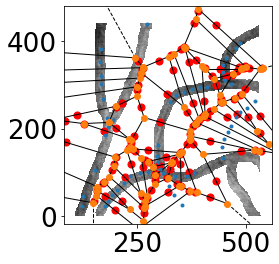

In [2]:
from sharedvariables import get_video_sessions
from patchextraction import extract_patches
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
vs = get_video_sessions(should_be_registered=True, should_have_marked_cells=True)[0]
points = vs.cell_positions[0]
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
def get_random_points_in_voronoi_diagram(centroids, limits):
    
    vor = Voronoi(centroids, qhull_options='Qbb Qc Qx', incremental=False)
    vor.close()

    edges = np.array(vor.ridge_vertices)

    edges_start = edges[:, 0]
    edges_end = edges[:, 1]

    vertices_start = vor.vertices[edges_start]
    print(vertices_start.shape)
    vertices_end = vor.vertices[edges_end]

    t = np.random.rand(vertices_start.shape[0])

    random_vertices = t[:, np.newaxis] * vertices_start + (1 - t[:, np.newaxis]) * vertices_end
    random_vertices = random_vertices[edges_start != -1]

    random_vertices = random_vertices[random_vertices[:, 0] >= 0]
    random_vertices = random_vertices[random_vertices[:, 0] <= limits[1]]
    random_vertices = random_vertices[random_vertices[:, 1] >= 0]
    random_vertices = random_vertices[random_vertices[:, 1] <= limits[0]]

    return random_vertices
random_points = get_random_points_in_voronoi_diagram(points, vs.frames_oa790[0].shape[:2])
plt.imshow(vs.fully_masked_frames_oa790[0], cmap='gray')
plt.scatter(random_points[:, 0], random_points[:, 1], c='r', s=50)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint, Point, Polygon
from scipy.spatial import Voronoi

points = [[-30.0, 30.370371], [-27.777777, 35.925926], [-34.444443, 58.51852], [-2.9629631, 57.777779], [-17.777779, 75.185181], [-29.25926, 58.148151], [-11.111112, 33.703705], [-11.481482, 40.0], [-27.037037, 40.0], [-7.7777777, 94.444443], [-2.2222223, 122.22222], [-20.370371, 106.66667], [1.1111112, 125.18518], [-6.2962961, 128.88889], [6.666667, 133.7037], [11.851852, 136.2963], [8.5185184, 140.74074], [20.370371, 92.962959], [17.777779, 114.81482], [12.962962, 97.037041], [13.333334, 127.77778], [22.592592, 120.37037], [16.296295, 127.77778], [11.851852, 50.740742], [20.370371, 54.814816], [19.25926, 47.40741], [32.59259, 122.96296], [20.74074, 130.0], [24.814816, 84.814819], [26.296295, 91.111107], [56.296295, 131.48149], [60.0, 141.85185], [32.222221, 136.66667], [53.703705, 147.03703], [87.40741, 196.2963], [34.074074, 159.62964], [34.444443, -2.5925925], [36.666668, -1.8518518], [34.074074, -7.4074073], [35.555557, -18.888889], [76.666664, -39.629627], [35.185184, -37.777779], [25.185184, 14.074074], [42.962959, 32.962963], [35.925926, 9.2592592], [52.222221, 77.777779], [57.777779, 92.222221], [47.037041, 92.59259], [82.222221, 54.074074], [48.888889, 24.444445], [35.925926, 47.777779], [50.740742, 69.259254], [51.111111, 51.851849], [56.666664, -12.222222], [117.40741, -4.4444447], [59.629631, -5.9259262], [66.666664, 134.07408], [91.481483, 127.40741], [66.666664, 141.48149], [53.703705, 4.0740738], [85.185181, 11.851852], [69.629631, 0.37037039], [68.518517, 99.259262], [75.185181, 100.0], [70.370369, 113.7037], [74.444443, 82.59259], [82.222221, 93.703697], [72.222221, 84.444443], [77.777779, 167.03703], [88.888893, 168.88889], [73.703705, 178.88889], [87.037041, 123.7037], [78.518517, 97.037041], [95.555557, 52.962959], [85.555557, 57.037041], [90.370369, 23.333332], [100.0, 28.51852], [88.888893, 37.037037], [87.037041, -42.962959], [89.259262, -24.814816], [93.333328, 7.4074073], [98.518517, 5.185185], [92.59259, 1.4814816], [85.925919, 153.7037], [95.555557, 154.44444], [92.962959, 150.0], [97.037041, 95.925919], [106.66667, 115.55556], [92.962959, 114.81482], [108.88889, 56.296295], [97.777779, 50.740742], [94.074081, 89.259262], [96.666672, 91.851852], [102.22222, 77.777779], [107.40741, 40.370369], [105.92592, 29.629629], [105.55556, -46.296295], [118.51852, -47.777779], [112.22222, -43.333336], [112.59259, 25.185184], [115.92592, 27.777777], [112.59259, 31.851852], [107.03704, -36.666668], [118.88889, -32.59259], [114.07408, -25.555555], [115.92592, 85.185181], [105.92592, 18.888889], [121.11111, 14.444445], [129.25926, -28.51852], [127.03704, -18.518518], [139.25926, -12.222222], [141.48149, 3.7037036], [137.03703, -4.814815], [153.7037, -26.666668], [-2.2222223, 5.5555558], [0.0, 9.6296301], [10.74074, 20.74074], [2.2222223, 54.074074], [4.0740738, 50.740742], [34.444443, 46.296295], [11.481482, 1.4814816], [24.074076, -2.9629631], [74.814819, 79.259254], [67.777779, 152.22223], [57.037041, 127.03704], [89.259262, 12.222222]]

points = np.array(points)

vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

pts = MultiPoint([Point(i) for i in points])
mask = mask_polygon
new_vertices = []
for region in regions:
    polygon = vertices[region]
    shape = list(polygon.shape)
    shape[0] += 1
    p = Polygon(np.append(polygon, polygon[0]).reshape(*shape)).intersection(mask)
    poly = np.array(list(zip(p.boundary.coords.xy[0][:-1], p.boundary.coords.xy[1][:-1])))
    new_vertices.append(poly)
    plt.fill(*zip(*poly), alpha=0.4)
plt.plot(points[:,0], points[:,1], 'ko')
plt.title("Clipped Voronois")
plt.show()

NotImplementedError: Multi-part geometries do not provide a coordinate sequence

In [59]:
p = Polygon(np.append(polygon, polygon[0]).reshape(*shape)).intersection(mask)
type(p)

shapely.geometry.polygon.Polygon

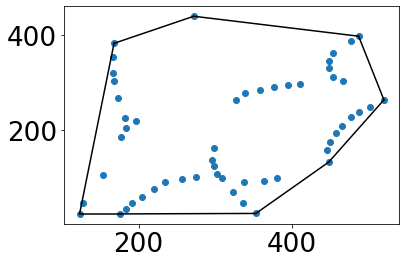

In [17]:
points = vs.cell_positions[0]
from scipy.spatial import ConvexHull, convex_hull_plot_2d
hull = ConvexHull(points)
plt.scatter(points[:,0], points[:,1])
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

In [54]:
import cv2
from collections import defaultdict
def mask_to_polygons(mask, epsilon=10., min_area=10.):
    """Convert a mask ndarray (binarized image) to Multipolygons"""
    # first, find contours with cv2: it's much faster than shapely
    image, contours, hierarchy = cv2.findContours(mask,
                                  cv2.RETR_CCOMP,
                                  cv2.CHAIN_APPROX_NONE)
    if not contours:
        return MultiPolygon()
    # now messy stuff to associate parent and child contours
    cnt_children = defaultdict(list)
    child_contours = set()
    assert hierarchy.shape[0] == 1
    # http://docs.opencv.org/3.1.0/d9/d8b/tutorial_py_contours_hierarchy.html
    for idx, (_, _, _, parent_idx) in enumerate(hierarchy[0]):
        if parent_idx != -1:
            child_contours.add(idx)
            cnt_children[parent_idx].append(contours[idx])
    # create actual polygons filtering by area (removes artifacts)
    all_polygons = []
    for idx, cnt in enumerate(contours):
        if idx not in child_contours and cv2.contourArea(cnt) >= min_area:
            assert cnt.shape[1] == 1
            poly = Polygon(
                shell=cnt[:, 0, :],
                holes=[c[:, 0, :] for c in cnt_children.get(idx, [])
                       if cv2.contourArea(c) >= min_area])
            all_polygons.append(poly)
    all_polygons = MultiPolygon(all_polygons)

    return all_polygons
mask_polygon = mask_to_polygons(np.uint8(vs.vessel_mask_confocal), min_area=800)[0]
type(mask_polygon)

shapely.geometry.polygon.Polygon

TypeError: Invalid shape (564,) for image data

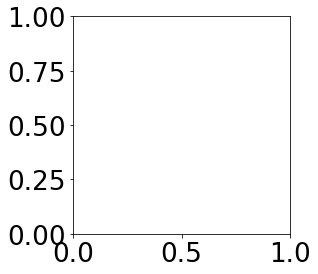

In [26]:
plt.imshow(np.uint8(vs.vessel_mask_confocal[0]))